In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
sns.set()

- https://matplotlib.org/tutorials/index.html#tutorials-colors
- https://seaborn.pydata.org/tutorial/color_palettes.html
- https://matplotlib.org/gallery/index.html#color-examples

#### 1. 使用`sns.color_palette`来设置颜色

In [2]:
%matplotlib inline

In [3]:
def get_prediction_error(h, h_pred):
    r2 = r2_score(h, h_pred)
    mre = cal_MRE(h, h_pred)
    rmse = np.sqrt(mean_squared_error(h, h_pred))
    return {'r2': r2, 'mre': mre, 'rmse': rmse}


def cal_MRE(h, h_pred):
    return np.median(np.abs(h_pred - h) / h)


def h_h_pred_compare_plot(data_set, ion_type, title,
                          file_path, show_error=False,
                          color_by='compound_class',
                          field='', by=''):
    """
    Only plot experimental CCS(checked_CCS) vs predicted CCS(pred_CCS)
    :param data_set: N-set, V-set or T-set, contains "checked_CCS" AND "pred_CCS"
    :param ion_type: pos or neg
    :param field: column name to filter data
    :param by: specific value of field(column)
    :param title:
    :param file_path:
    :param show_error: show "MRE", "R^2" and "RMSE"
    :param color_by: color by "compound_class" or "adducts" type
    :return: pictures
    """
    plt.figure(figsize=(6, 6))
    color_types = data_set[color_by].unique()
    # 自定义颜色，或使用seaborn中定义好的颜色集，可以根据需要来设置颜色的数量
    # https://seaborn.pydata.org/tutorial/color_palettes.html
    flatui = ["#9b59b6", "#3498db", "#e74c3c", "#2ecc71"]
    cc = sns.color_palette(flatui, len(color_types))
    # print(cc)

    if field:
        data_need_pred_inx = data_set[data_set[field] == by].index
    else:
        data_need_pred_inx = data_set.index
    y = data_set.loc[data_need_pred_inx, 'checked_CCS']
    y_pred = data_set.loc[data_need_pred_inx, 'pred_CCS']

    for i, col_t in enumerate(color_types):
        # col means column
        color_by_col = data_set.loc[data_need_pred_inx, color_by]
        # 利用colors.rgb2hex将RGB格式(0.1, 0.2, 0.5)的颜色转换成HEX格式(#0F0F0F)
        plt.scatter(y[color_by_col == col_t],
                    y_pred[color_by_col == col_t],
                    label=col_t, c=colors.rgb2hex(cc[i]), alpha=1 - i*0.15)

    ccs_max = int(max(np.max(data_set.loc[data_need_pred_inx, ['checked_CCS', 'pred_CCS']])))
    ccs_min = int(min(np.min(data_set.loc[data_need_pred_inx, ['checked_CCS', 'pred_CCS']])))
    plt.plot(np.linspace(ccs_min-10, ccs_max+10), np.linspace(ccs_min-10, ccs_max+10), 'r--', label='$y = x$')
    plt.xlabel('Exp CCS')
    plt.ylabel('Pred CCS')
    plt.title('Exp vs pred CCS (SVR, {}, {})'.format(ion_type, title))
    if show_error:
        plt.legend(loc='lower right')
        pred_error = get_prediction_error(h=y, h_pred=y_pred)
        print(pred_error)
        plt.text(ccs_min, ccs_max, 'MRE={:.3f}%'.format(pred_error['mre']*100))
        plt.text(ccs_min, ccs_max-10, '$R^2$={:.3f}'.format(pred_error['r2']))
        plt.text(ccs_min, ccs_max-20, 'RMSE={:.3f}'.format(pred_error['rmse']))
    else:
        plt.legend(loc='best')
    plt.tight_layout()
    if file_path:
        plt.savefig(file_path.format(ion_type), dpi=300)  # 'Exp_vs_pred_CCS_SVR_pos.png'


In [4]:
data = pd.read_csv('test_data.csv')
data.head()

,all_cc_inx,adducts,checked_CCS,pred_CCS
0,all-cc-3,[M+H]+,181.909049,177.172103
1,all-cc-24,[M+Na]+,212.500000,202.647064
2,all-cc-27,[M+H]+,140.365361,126.640907
3,all-cc-35,[M+H]+,137.440425,134.798737
4,all-cc-45,[M+H-H2O]+,138.313240,136.523665


{'r2': 0.99027676216985738, 'mre': 0.011480752228907499, 'rmse': 5.9198592543013682}


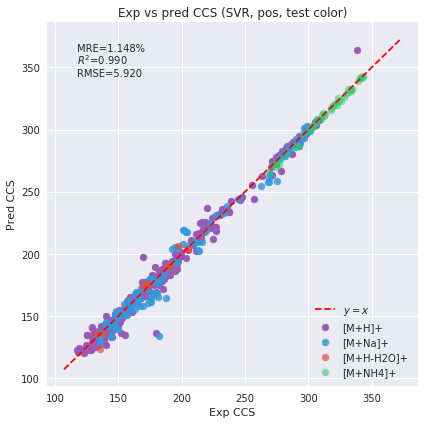

In [5]:
h_h_pred_compare_plot(data_set=data, ion_type='pos',
                      title='test color', color_by='adducts',
                      show_error=True, file_path='')